#FINAL REPORT

# <font color="red">["AIRBNB NEWYORK DATASET EXPLORATION" - 19]</font>


Ayşenur Çerçi - 25024 \
Müzeyyen Alkap - 25046 \
Group ID - 19

##<font color = "blue">Introduction</font>


###<font color = "red">Problem Definition</font>

In this project, we focus on *price level* and its factors. 
We search for factors which may affect price level air-BnB rooms. \
In order to achieve our goal, we use various methods like tests, formulas, machine learning algorithms, graphs and visualization methods.\
We investigate two datasets. 
We start by describing the datasets. \
Then by using the first one, we look for a relationship between **availability_365** days and **price**. \
Our second dataset provides us to detect correlations between **price - cancellation policy** and **price - ratings**. \
In the end, we state which factor has the greatest impact on price.
In summary, our problem is understanding the reason behind the difference between prices. 


###<font color = "red">Utilized Datasets</font> 
One of the dataset was given by you and it gives opportunity to study on availability_365 and price relation.

We found another dataset from https://public.opendatasoft.com/explore/embed/dataset/airbnb-listings/table/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&refine.city=New%20York to study on how price is related with other factors such as cancellation policy of the rooms and ratings by people.



In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
path_prefix = "/content/drive/My Drive"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import seaborn as sns

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/dataset.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [ ]:
%matplotlib inline

df2 = pd.read_csv('/content/drive/My Drive/bnb_dosya.csv')
df2.head()


,latitude,longitude,Cancellation policy,Review scores rating,Price
0,"40,75579447","-73,91479552",strict,99.0,90.0
1,"40,77266519","-73,92192019",strict,98.0,38.0
2,"40,76582741","-73,91085645",strict,99.0,59.0
3,"40,75444256","-73,76938475",strict,NaN,60.0
4,"40,71238683","-74,01619611",flexible,NaN,400.0



####Dataframe Manipulations


1- **Get rid of NaN and duplicated values** : Since NaN values and duplications may cause a wrong interpretation, we should get rid of them  

2- **Describe** to see changes 

3- **Visualize** data categories that has integer values

4- **Categorization and visualization of room types**

5- **Categorization and visualization of neighbourhood types** with trying different type of plot techniques

6- Construct **correlation matrix** in order to see which categories are more related with each other


In [ ]:
# see percentage of NaNs
row = df.shape[0]
df.isnull().sum() / row * 100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [ ]:
#drops NaNs
df = df.dropna(how= "any") 
# dropping duplicate values
df = df.drop_duplicates()
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
df2 = df2.dropna(how= "any") 
df2 = df2.drop_duplicates()
df2.head()

,latitude,longitude,Cancellation policy,Review scores rating,Price
0,"40,75579447","-73,91479552",strict,99.0,90.0
1,"40,77266519","-73,92192019",strict,98.0,38.0
2,"40,76582741","-73,91085645",strict,99.0,59.0
8,"40,7157044","-73,99094191",strict,94.0,399.0
10,"40,71494822","-73,99056227",flexible,100.0,60.0


Here the brief overwiev of our datasets. \
**Date Frame 1:** \
It has two types of data; \
1 - Numerical Data: \


*   id / host id = id's of rooms and hosts
*   longitude / latitude = geological coordinates of rooms 

*   price = price of rooms in dollar
*   minimum nights = required minimum # of night

*   reviews numbers = # of reviews per month and total
*   host listing count = # of hosts of the rooms

*   availability = # of available days of the room during a year 

2 - Categorical Data: \


*   name/ host name = names of room and its hosts
*   neighbourhood = group of neighbourhood which the room belongs to 

*   room type = type of the room














In [ ]:
print(df.dtypes)
df.describe()

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,40.728129,-73.951149,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,1.069372e+07,7.589752e+07,0.054991,0.046693,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Data Frame 2:** \
1 - Numerical Data: \
 
*   price = price of the room

*   review score rating = total rating scores of the room

2 - Categorical Data: \

*   cancellation policy = how flexiable to cancel a reservation

*   longitude / latitude = geological coordinates of rooms










In [ ]:
print(df2.dtypes)
df2.describe()

latitude                 object
longitude                object
Cancellation policy      object
Review scores rating    float64
Price                   float64
dtype: object


,Review scores rating,Price
count,15920.000000,15920.000000
mean,93.186997,165.760239
std,8.340778,117.638315
min,20.000000,0.000000
25%,90.000000,90.000000
50%,95.000000,135.000000
75%,100.000000,200.000000
max,100.000000,999.000000


<font color = 'red'>Data Visualization </font>

All distributions of various variables and their plotted figures that helps understand what we are dealing with.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94cd22e4a8>,
      dtype=object)

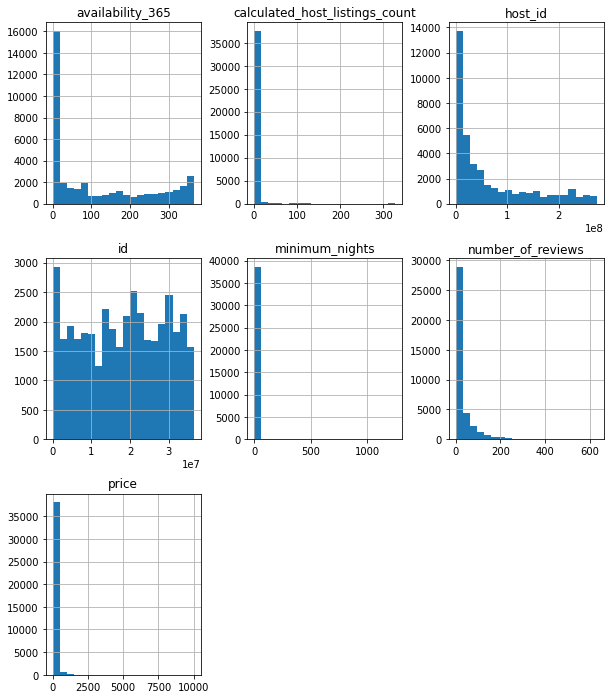

In [ ]:
numerical_attributes = df.select_dtypes(include = ['int'])

numerical_attributes.hist(figsize=(10,12), bins = 20)

In order to evalute air-bnb houses, we should categorize them.
First categorization is **room types**.

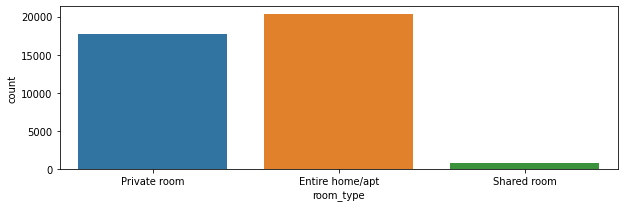

In [ ]:
#plotting count plot for categorical values
categorical_attributes = df.select_dtypes(include =["object"])

#Room types count plot
plt.figure(figsize=(10,3))
sns.countplot(data = categorical_attributes, x = "room_type")


Here we can see there are 3 types of rooms. Entire home/apt room type is the most popular one. On the other hand, # of shared rooms are remarkable less than the others. 

Our second categorization is **neighbourhood groups** which show near air-bnb rooms in a given area. 

---



In [ ]:
#deciding neighbourhood groups
df["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

<font color = 'red'>Groupby Feature </font>

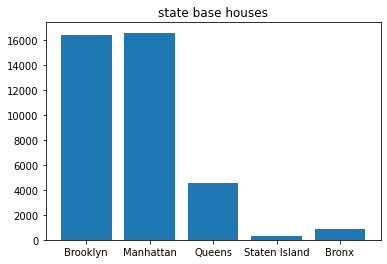

In [ ]:
#neighbourhood counts

d = df.copy()
d = d.groupby('neighbourhood_group')

Brooklyn=d.get_group("Brooklyn")
Manhattan =d.get_group("Manhattan")
Queens=d.get_group("Queens")
StatenIsland=d.get_group("Staten Island")
Bronx=d.get_group("Bronx")

#bar chart
x = ["Brooklyn","Manhattan","Queens","Staten Island","Bronx"]
y = [len(Brooklyn), len(Manhattan), len(Queens), len(StatenIsland),len(Bronx)]
fig, ax = plt.subplots()
ax.bar(x, y)
ax.set_title('state base houses')

plt.show()


There are 5 neighbourhood groups: \
1- Brooklyn \
2- Manhattan \
3- Queens \
4- Staten Island \
5- Bronx \
Brooklyn and Manhattan have visibly more rooms than the others.


We wanted to show the same plotting above with various colors in order to observe effects of colors, vizualization.

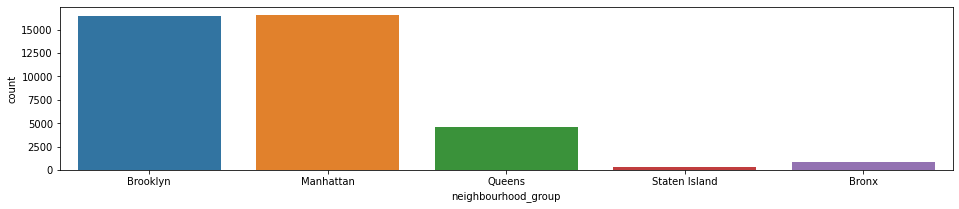

In [ ]:
plt.figure(figsize=(16,3))
sns.countplot(data = categorical_attributes, x = "neighbourhood_group")
# there are 5 neighbourhood groups, Brooklyn and Manhattan dominate almost all New York

<font  color='red'>Correlation Matrix</font>

Text(0.5, 1.05, 'Pearson Correlatin of Features')

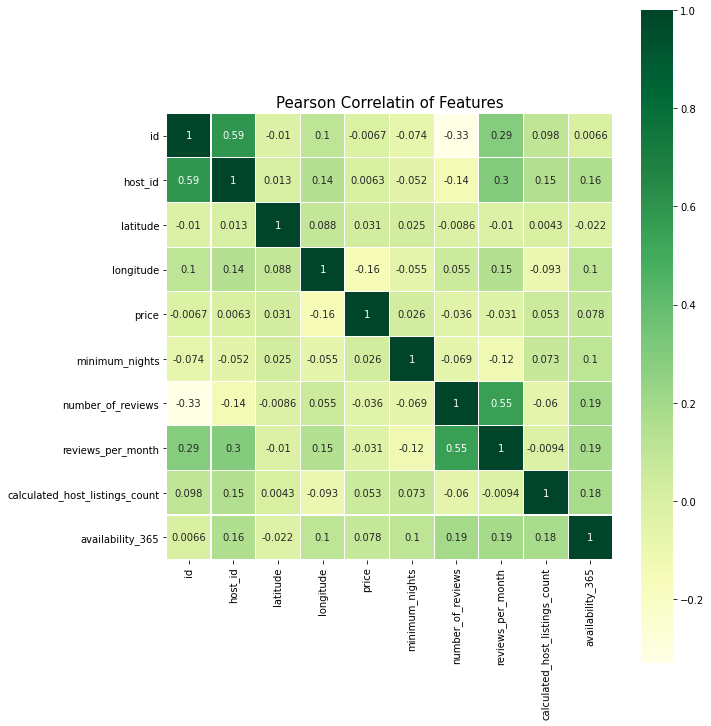

In [ ]:
#compute the correlation matrix
corr = df.corr()

#set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,12))

#generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#draw the heatmap
_ = sns.heatmap(corr, cmap= "YlGn", square= True, ax=ax, annot=True, linewidths=0.1)

plt.title("Pearson Correlatin of Features", y=1.05, size=15)


It is seen that there is no extreme correlation. As we see price and availability is correlated with coefficient 0.078. Although it seems small, we should elaborate more to obtain more accurate conclusion due to the fact that it is large dataset. 

##### Price Study
  

*  **Mean of the price values** should be obtained in order to gain insight about the price level

*   Visualize **distribution of the price values**

*   Drop **outlier values** from the dataframe 







In [ ]:

#Mean of the price values
print('MAX=',max(df["price"]),'MIN=',min(df["price"]))

def fmean(data):
  s = 0
  for observation in data:
    s += observation
  return s/len(data)

mean = fmean(df["price"])
print('Mean=',mean)



MAX= 10000 MIN= 0
Mean= 142.33252621004095


As it is seen, the maximum value among the prices is 10000 and the minimum value among the prices is 0 which means it is free room. Also, we found mean around 142. 

<function matplotlib.pyplot.show>

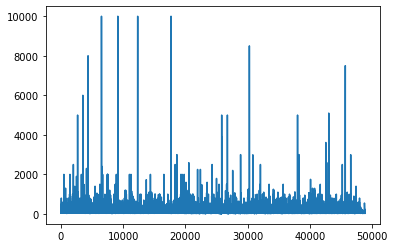

In [ ]:
# the distribution of prices
x = range(0, df.shape[0])
y = df["price"]
plt.plot(df["price"])
#plt.plot(x ,y)
plt.show

In [ ]:
# dropping outlier
# removing outliers from our training data, as these tend to shift our model towards the wrong results.
i = df[df["price"]> 1000].index
df = df.drop(i)


We should drop the outlier price values from the data, above 1000,  because it may cause a wrong interpretation.

######Price Categories

In [ ]:
#constructing price categories
#Since mean is around 142 we can take 150 as a base like 0-50 / 50-100 / 100-200 / 200-500 / 500-1000

def price(i):
  if 0 < i and i <50:
    return "very cheap" 
  elif 50 < i and i <= 100:
    return "cheap" 
  elif 100 < i and i <= 200:
    return "normal" 
  elif 200 < i and i <= 500:
    return "expensive" 
  elif 500 < i:
    return "very expensive" 
  elif i < 0:
    return "invalid"
  else:
    return "free" #price is 0

#new column that shows price levels
df["price_category"]=df["price"].apply(price)
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365,normal
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355,expensive
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194,cheap
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0,cheap
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,6/22/2019,0.59,1,129,normal


We categorized price column with respect to the price level which are very cheap, cheap, normal, expensive, very expensive and invalid.

In [ ]:
print('MAX=',max(df2["Price"]),'MIN=',min(df2["Price"]))

def fmean(data):
  s = 0
  for observation in data:
    s += observation
  return s/len(data)

mean = fmean(df2["Price"])
print('Mean=',mean)


MAX= 999.0 MIN= 0.0
Mean= 165.76023869346733


In [ ]:
#Since mean = 165 take 150 as middle again

def price(i):
  if 0 < i and i <50:
    return 1 #"very cheap" 
  elif 50 < i and i <= 100:
    return 2 #"cheap" 
  elif 100 < i and i <= 200:
    return 3 #"normal" 
  elif 200 < i and i <= 500:
    return 4 #"expensive" 
  elif 500 < i:
    return 5 #"very expensive" 
  elif i < 0:
    return -1 #"invalid"
  else:
    return 0 #"free" #price is 0

#new column that shows price levels
df2["price_category"]=df2["Price"].apply(price)
df2.head()


,latitude,longitude,Cancellation policy,Review scores rating,Price,price_category
0,"40,75579447","-73,91479552",strict,99.0,90.0,2
1,"40,77266519","-73,92192019",strict,98.0,38.0,1
2,"40,76582741","-73,91085645",strict,99.0,59.0,2
8,"40,7157044","-73,99094191",strict,94.0,399.0,4
10,"40,71494822","-73,99056227",flexible,100.0,60.0,2


In [ ]:
#In order to see if there are invalid or free rooms

invalid = df["price_category"] == "invalid"
print(df[invalid].sum())

free = df["price_category"] == "free"
print(df[free].count(0))



id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
price_category                    0.0
dtype: float64
id                                1198
name                              1198
host_id                           1198
host_name                         1198
neighbourhood_group               1198
neighbourhood                     1198
latitude                          1198
longitude                         1198
room_type                  


It is seen that there are not any invalid rooms which we referred the price as below 0.
However, there are 1198 rooms which are free.

Now, that we have done all kinds of analysis and quality check on price column let’s have a look at the relationship among various columns.





#####Availability Study

In [ ]:
print("MAX=", max(df["availability_365"]),'MIN=', min(df["availability_365"]))

def fmean(data):
  s = 0
  for observation in data:
    s += observation
  return s/len(data)

mean = fmean(df["availability_365"])
print('Mean=', mean)


MAX= 365 MIN= 0
Mean= 114.60939195123211


Since there are 365 days in a year there is no outlier data. Mean of the availability in year is around 114 day

######Availability Categories

Availability_365 is categorized with respect to the availability level which are 'rarely', 'sometimes', 'often' , 'mostly' and 'outlier'    

In [ ]:
#Since mean is around 114 we can take 120 as base like 0-60 / 60-120 / 120-250 / 250-365 

def available(a):
  if 0 < a and a <60:
    return "rarely" 
  elif 60 < a and a <= 120:
    return "sometimes" 
  elif 120 < a and a <= 250:
    return "often" 
  elif 250 < a and a <= 365:
    return "mostly" 
  elif a < 0 or a >365:
    return "outlier"

#new column that shows availability level in a year
df["availability"]=df["availability_365"].apply(available)
df.head(5)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_category,availability
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365,normal,mostly
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355,expensive,mostly
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194,cheap,often
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0,cheap,None
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,6/22/2019,0.59,1,129,normal,often


<font color='red'>Horizontal Bar Chart</font>

Rarely available room count =  7037
Sometimes available room count =  4037
Oftern available room count =  6256
Mostly available room count =  8644


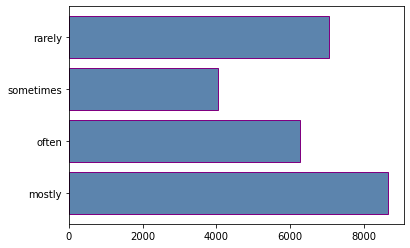

In [ ]:
print("Rarely available room count = " , len(df[df['availability'] == 'rarely']))
print("Sometimes available room count = " , len(df[df['availability'] == 'sometimes']))
print("Oftern available room count = " , len(df[df['availability'] == 'often']))
print("Mostly available room count = " , len(df[df['availability'] == 'mostly']))


fig, ax = plt.subplots()

people = ('rarely', 'sometimes', 'often', 'mostly')
y_pos = np.arange(len(people))
performance =(len(df[df['availability'] == 'rarely']), len(df[df['availability'] == 'sometimes']),
              len(df[df['availability'] == 'often']),len(df[df['availability'] == 'mostly']))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, color=(0.2, 0.4, 0.6, 0.8),  edgecolor='purple')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)


ax.invert_yaxis()

Horizontal bar chart shows the count of availability categories. It suggests that the # of rooms that are available mostly is more than the others. 

This is just distribution of price in order to see its variation.

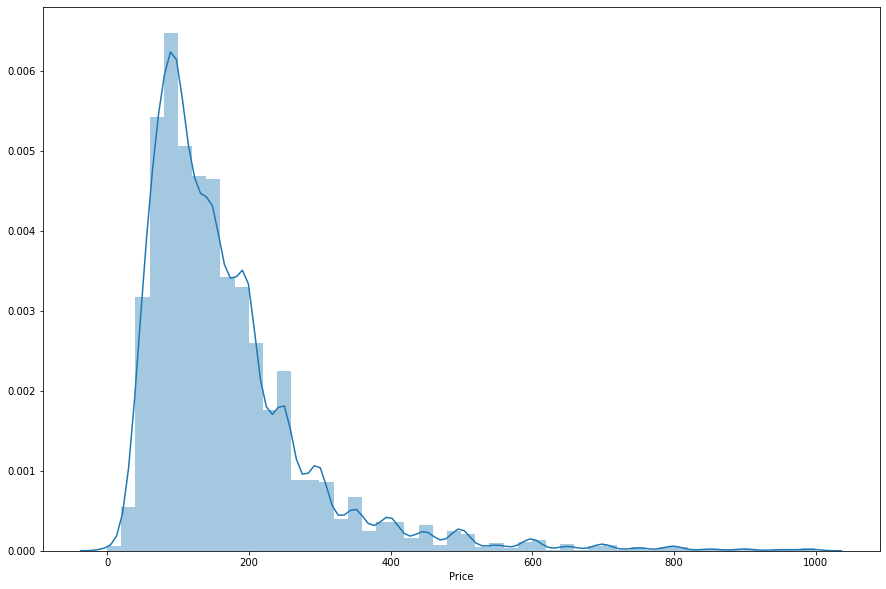

In [ ]:
import seaborn as seabornInstance 

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df2['Price'])

##<font color= "blue">Data Exploration</font>
The relations between price and the three variables.

###Availability

In order to see any relation between price and availability we should use some grouping and testing techniques. 

In [ ]:
correlationcoeff = df['price'].corr(df['availability_365'])
print('Correlation=', correlationcoeff)
#shows there is a kind of correlation

Correlation= 0.10505037634218874


In [ ]:
df_copy = df.copy()
df_copy = df_copy.groupby(["price_category"])["availability_365"].mean()
df_copy

price_category
cheap             109.445046
expensive         140.304917
free              102.426544
normal            107.718178
very cheap        115.091001
very expensive    200.184466
Name: availability_365, dtype: float64

Above dataframe shows how the each price category is distributed among availability mean of that category


<font color='red'>LinearPlot</font>

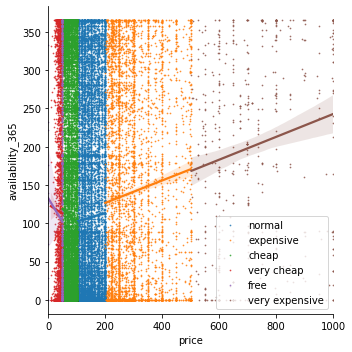

In [ ]:
#plot of the the relation of the availability day count and price category 
# Use the 'hue' argument to provide a factor variable
sns.lmplot(x="price" , y= "availability_365" , data=df, hue= "price_category", legend = False, scatter_kws={"s": 0.5})
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
plt.show()

By using linear plotting, we visualized the how price tends with respect to the availability categories. 

T-Test
We tested our variables with setting two hypothesises which are null hypothesis and alternative hypothesis. \
It is two-tailed probability because the alternative hypothesis covers both sides of null hypothesis. \
Our α = 0.05 for ctritical region.



<font color = 'red'>H0 : Price and availability_365 are independent variables

H1 : Price and availability_365 are not independent variables</font>










In [ ]:
#T-test
from scipy import stats

df[['price','availability_365']].describe()

ttest,pval = stats.ttest_rel(df['price'], df['availability_365'])

print('p-value=', pval)

if pval < 0.05:
    print("H1")
else:
    print("H0")

p-value= 1.9548855674513922e-149
H1


Since p-value is below alpha (0.05) we should reject null hypothesis and accept alternative hypothesis which suggests that price and availability_365 are not independent variables.

###Cancellation policy

We will examine the correlation between stringency of cancellation policy and price level. It means how price chances when the cancellation policy is more strict.




Strict cancellation policy count =  8668
Flexible cancellation policy count =  3373
Moderate cancellation policy count =  3875
Super-strict cancellation policy count =  4


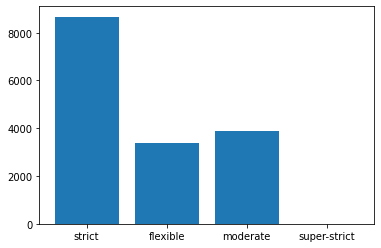

In [ ]:
print("Strict cancellation policy count = " , len(df2[df2['Cancellation policy'] == 'strict']))
print("Flexible cancellation policy count = " , len(df2[df2['Cancellation policy'] == 'flexible']))
print("Moderate cancellation policy count = " , len(df2[df2['Cancellation policy'] == 'moderate']))
print("Super-strict cancellation policy count = " , len(df2[df2['Cancellation policy'] == 'super_strict_30']))

d2 = df2.copy()
d2 = d2.groupby('Cancellation policy')

strict = d2.get_group("strict")
flexible =d2.get_group("flexible")
moderate = d2.get_group("moderate")
super_strict = d2.get_group("super_strict_30")


#bar chart
x = ["strict","flexible","moderate","super-strict"]
y = [len(strict), len(flexible), len(moderate), len(super_strict)]
fig, ax = plt.subplots()
ax.bar(x, y)

plt.show()

In order to use cancellation policy level as a data we converted into the numeric data. 

In [ ]:
def canc_convert(row):
  if  row == "super_strict_30":
    return 4
  elif row == "strict":
    return 3
  elif row ==  "moderate":
    return 2
  elif row == "flexible":
    return 1

df2["Cancellation policy number"] = df2["Cancellation policy"].apply(canc_convert)
df2["Cancellation policy number"]

0        3
1        3
2        3
8        3
10       1
        ..
20802    2
20803    3
20804    3
20805    3
20806    2
Name: Cancellation policy number, Length: 15920, dtype: int64

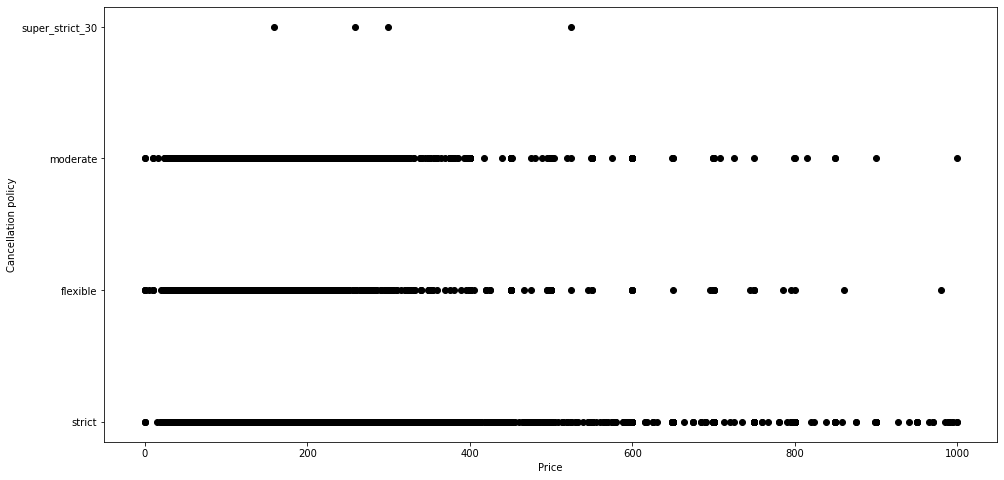

In [ ]:

plt.figure(figsize=(16, 8))
plt.scatter(
    df2['Price'],
    df2['Cancellation policy'],
    c='black'
)
plt.xlabel("Price")
plt.ylabel("Cancellation policy")
plt.show()

Above plotting shows that there are more rooms which has high prices also has strict cancellation policy.

In [ ]:
from scipy.stats import pearsonr

x = df2['Price']
y = df2['Cancellation policy number']
stat, p = pearsonr(x, y ) 
print('p-value=', p)

if p > 0.05:
	print('Independent')
else:
	print('Dependent')

p-value= 1.3892695130157986e-111
Dependent


As Pearson’s Correlation Coefficient suggests price and cancellation policy level are correlated.

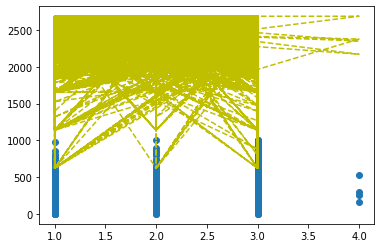

In [ ]:
plt.scatter(df2['Cancellation policy number'],df2['Price'])
z = np.polyfit(df2['Cancellation policy number'], df2['Price'], 1)
p = np.poly1d(z)
plt.plot(df2['Cancellation policy number'], p(df2['Review scores rating']), "y--")

###Rating

Here is the relationship between rating and price. Since we have too many data, it is hard to see all matches clearly. Besides we observe the **trendline** which points to the relation between variables. As trendline suggests, variables are **not greatly** related, on the other hand, they have a **positive** relationship. 

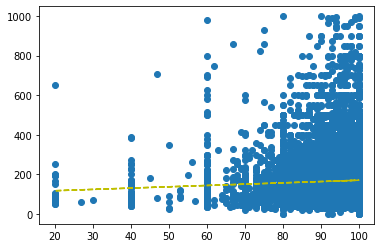

In [ ]:
plt.scatter(df2['Review scores rating'],df2['Price'])
z = np.polyfit(df2['Review scores rating'], df2['Price'], 1)
p = np.poly1d(z)
plt.plot(df2['Review scores rating'], p(df2['Review scores rating']), "y--")

##<font color = "blue">Machine Learning Models</font>

###<font color = "red">Implementation</font>

####Decision Tree

Model Code

In [ ]:
from matplotlib.colors import ListedColormap
from ipywidgets import interact

def visualize_model(model, data, labels, ax, title):
  step = 0.05

  cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
  cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

  model.fit(data, labels)

  x_min = data[:, 0].min() - 1
  x_max = data[:, 0].max() + 1
  y_min = data[:, 1].min() - 1
  y_max = data[:, 1].max() + 1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
  y_pred = model.predict(np.hstack([xx.reshape(-1,1), yy.reshape(-1,1)])).reshape(xx.shape)

  ax.pcolormesh(xx, yy, y_pred, cmap=cmap_light)
  ax.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap_bold, edgecolor='k', s=20)
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_title(title)

Dataframe we will be working on

In [ ]:
df_copy = df2[[ 'Cancellation policy number', 'Review scores rating', 'Price']]
df_copy

,Cancellation policy number,Review scores rating,Price
0,3,99.0,90.0
1,3,98.0,38.0
2,3,99.0,59.0
8,3,94.0,399.0
10,1,100.0,60.0
...,...,...,...
20802,2,100.0,249.0
20803,3,94.0,230.0
20804,3,100.0,250.0
20805,3,100.0,80.0


Models and accuracy scores corresponding to the min sample leaves

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy1: 0.04 (+/- 0.01)
Accuracy2: 0.04 (+/- 0.01)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy3: 0.05 (+/- 0.01)


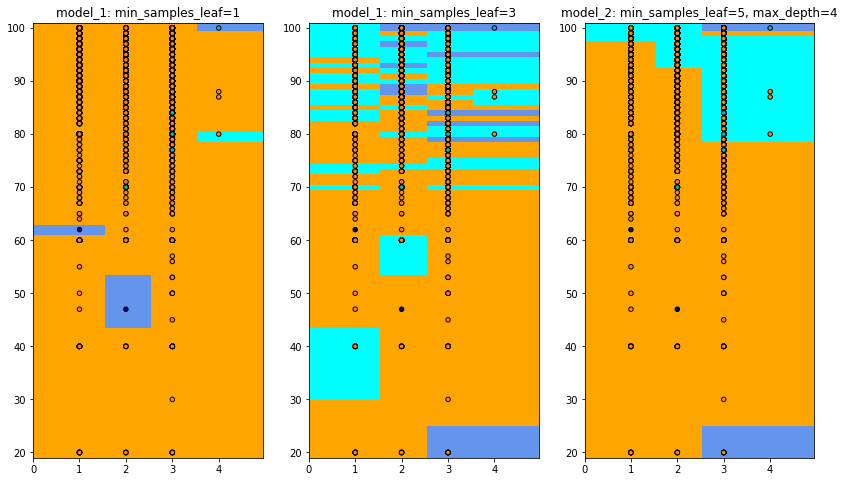

In [ ]:
# your code
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score

#splitting part
X = df_copy.drop('Price', axis=1).values # these are features
y = df_copy['Price'].values              # this is the target (what we want to predict)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.10)



model_1 = tree.DecisionTreeClassifier(min_samples_leaf=1) #Create decision tree classifier object
model_1.fit(X_train, y_train) #train the classifier using the training data
accuracies = cross_val_score(model_1, X_train, y_train, cv=10)
print("Accuracy1: %0.2f (+/- %0.2f)" % (accuracies.mean(), accuracies.std() * 2))

model_2 = tree.DecisionTreeClassifier(min_samples_leaf=2) #Create decision tree classifier object
model_2.fit(X_train, y_train) #train the classifier using the training data
accuracies2 = cross_val_score(model_2, X_train, y_train, cv=10)
print("Accuracy2: %0.2f (+/- %0.2f)" % (accuracies2.mean(), accuracies2.std() * 2))

model_3 = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=4) #Create decision tree classifier object
model_3.fit(X_train, y_train) #train the classifier using the training data
accuracies3 = cross_val_score(model_3, X_train, y_train, cv=10)
print("Accuracy3: %0.2f (+/- %0.2f)" % (accuracies3.mean(), accuracies3.std() * 2))


fig, axs = plt.subplots(nrows= 1,ncols= 3, figsize=(14,8))
visualize_model(model_1,  X_train, y_train,axs[0], "model_1: min_samples_leaf=1" )
visualize_model(model_2,  X_train, y_train,axs[1], "model_1: min_samples_leaf=3" )
visualize_model(model_3,  X_train, y_train,axs[2], "model_2: min_samples_leaf=5, max_depth=4" )

Here, we noticed that we are tried to estimate the exact prices on these models. With this way, it is very unlikely to obtain a good accuracy score because it is very hard to predict exact price value.
It means we used continuous variable, however we must use discrete variable while using decision tree method.
So, instead of working on exact price values,  we should work on price categories.  


In [ ]:
df_copy_2 = df2[[ 'Cancellation policy number', 'Review scores rating', 'price_category']]
df_copy_2

,Cancellation policy number,Review scores rating,price_category
0,3,99.0,2
1,3,98.0,1
2,3,99.0,2
8,3,94.0,4
10,1,100.0,2
...,...,...,...
20802,2,100.0,4
20803,3,94.0,4
20804,3,100.0,4
20805,3,100.0,2


Models and accuracy scores corresponding to the min sample leaves 

In [ ]:
# your code
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score

#splitting part
X_2 = df_copy_2.drop('price_category', axis=1).values # these are features
y_2 = df_copy_2['price_category'].values              # this is the target (what we want to predict)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=1, test_size=0.10)



model_1 = tree.DecisionTreeClassifier(min_samples_leaf=1) #Create decision tree classifier object
model_1.fit(X_train, y_train) #train the classifier using the training data
accuracies = cross_val_score(model_1, X_train_2, y_train_2, cv=10)
print("Accuracy1: %0.2f (+/- %0.2f)" % (accuracies.mean(), accuracies.std() * 2))

model_2 = tree.DecisionTreeClassifier(min_samples_leaf=2) #Create decision tree classifier object
model_2.fit(X_train, y_train) #train the classifier using the training data
accuracies2 = cross_val_score(model_2, X_train_2, y_train_2, cv=10)
print("Accuracy2: %0.2f (+/- %0.2f)" % (accuracies2.mean(), accuracies2.std() * 2))

model_3 = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=4) #Create decision tree classifier object
model_3.fit(X_train, y_train) #train the classifier using the training data
accuracies3 = cross_val_score(model_3, X_train_2, y_train_2, cv=10)
print("Accuracy3: %0.2f (+/- %0.2f)" % (accuracies3.mean(), accuracies3.std() * 2))

Accuracy1: 0.42 (+/- 0.01)
Accuracy2: 0.42 (+/- 0.01)
Accuracy3: 0.43 (+/- 0.02)


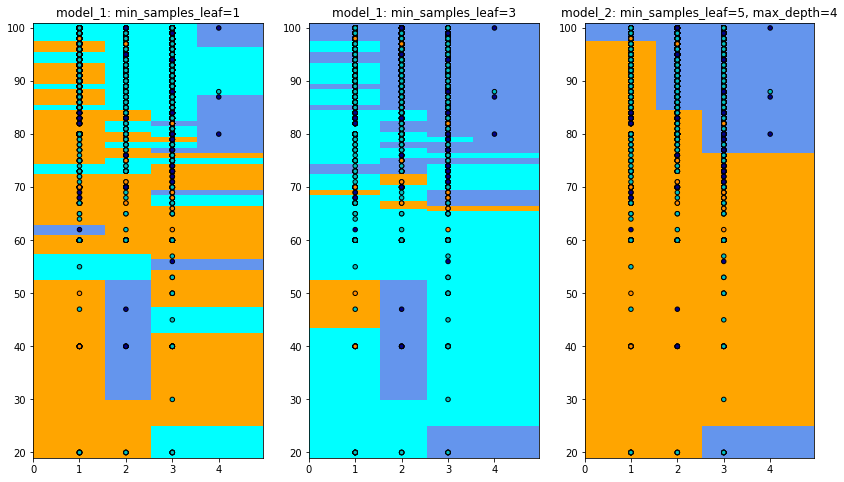

In [ ]:
fig, axs = plt.subplots(nrows= 1,ncols= 3, figsize=(14,8))
visualize_model(model_1,  X_train_2, y_train_2,axs[0], "model_1: min_samples_leaf=1" )
visualize_model(model_2,  X_train_2, y_train_2,axs[1], "model_1: min_samples_leaf=3" )
visualize_model(model_3,  X_train_2, y_train_2,axs[2], "model_2: min_samples_leaf=5, max_depth=4" )

####K-Nearest Neighbour

Code for visualizing

In [ ]:
from matplotlib.colors import ListedColormap
from ipywidgets import interact

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#splitting part
X = df_copy.drop('Price', axis=1).values # these are features
y = df_copy['Price'].values              # this is the target (what we want to predict)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.10)


def visualize_model2(model, ax, title):
  step = 0.05

  cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
  cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

  data = df_copy[["Cancellation policy number", "Review scores rating"]].values
  labels = df_copy["Price"].values

  model.fit(data, labels)

  x_min = data[:, 0].min() - 1
  x_max = data[:, 0].max() + 1
  y_min = data[:, 1].min() - 1
  y_max = data[:, 1].max() + 1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
  y_pred = model.predict(np.hstack([xx.reshape(-1,1), yy.reshape(-1,1)])).reshape(xx.shape)

  ax.pcolormesh(xx, yy, y_pred, cmap=cmap_light)
  ax.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap_bold, edgecolor='k', s=20)
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_title(title)

Code for K-Nearest Classifier and visualized models are below.

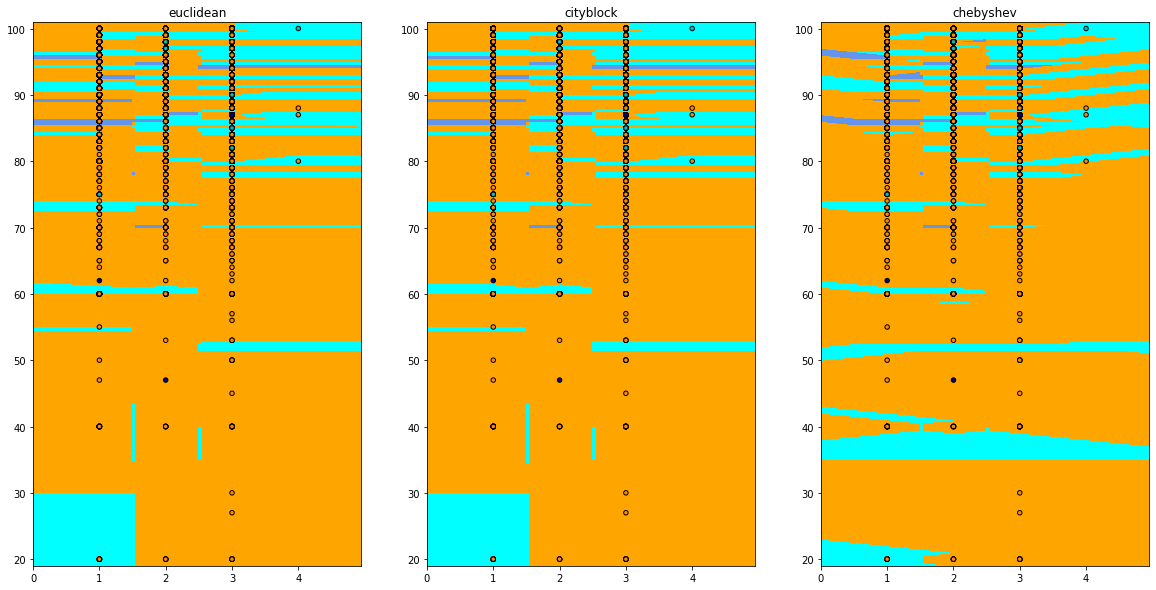

In [ ]:
# your code

# set the hyperparameter k
k=5

fig, (ax1,ax2,ax3) = plt.subplots(1,3 ,figsize= (20,10))
#fig,ax1 = plt.subplots(1,1, figsize= (10,10))

# generate the model
model1 = KNeighborsClassifier(k, metric="euclidean")
model2 = KNeighborsClassifier(k, metric="cityblock")
model3 = KNeighborsClassifier(k, metric="chebyshev")

ax1 = visualize_model2(model1, ax1, "euclidean" )
ax2 = visualize_model2(model2, ax2, "cityblock" )
ax3 = visualize_model2(model3, ax3,"chebyshev" )

Accuracy values corresponding to the distance functions

In [ ]:
from sklearn.metrics import accuracy_score

# fit training data
model1.fit(X_train, y_train)
# predict the validation data
y_pred = model1.predict(X_test)
# obtain the accuracy value
accuracy_1 = f"{accuracy_score(y_test, y_pred):.2f}"


model2.fit(X_train, y_train)
# predict the validation data
y_pred = model2.predict(X_test)
# obtain the accuracy value
accuracy_2 = f"{accuracy_score(y_test, y_pred):.2f}"

model3.fit(X_train, y_train)
# predict the validation data
y_pred = model3.predict(X_test)
# obtain the accuracy value
accuracy_3 = f"{accuracy_score(y_test, y_pred):.2f}"


print ("Accuracy for euclidean = " , accuracy_1)
print ("Accuracy for cityblock = " , accuracy_2)
print ("Accuracy for chebyshev = " , accuracy_3)



Accuracy for euclidean =  0.01
Accuracy for cityblock =  0.01
Accuracy for chebyshev =  0.01


Again, we tried to estimate the exact prices on these models. With this way, it is very unlikely to obtain a good accuracy score because it is very hard to predict exact price value.
So, instead of working on exact price values, we should work on price categories. 

In [ ]:


X_2 = df_copy_2.drop('price_category', axis=1).values # these are features
y_2 = df_copy_2['price_category'].values              # this is the target (what we want to predict)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=1, test_size=0.10)

# 80% for training and 20% for testing-validation
X_train, X_remaining, y_train, y_remaining = train_test_split(X_2, y_2, test_size=0.20, random_state=42)
# 10% validation, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)

Hyperparameter K is impoartant parameter for models. Since it may change accuracy score of models we should choose K-value which gives the higher accuracy score. 

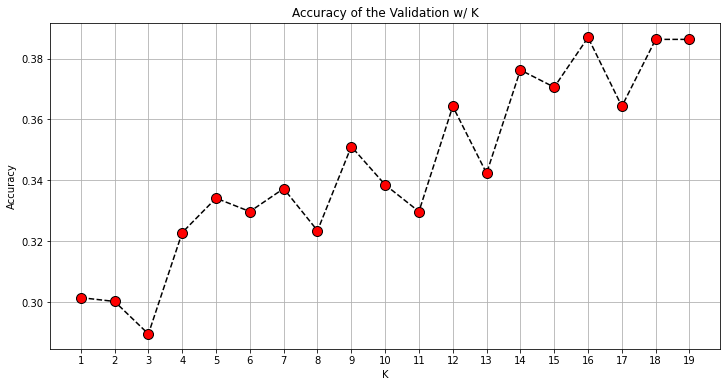

In [ ]:
from sklearn.metrics import accuracy_score

K_range = np.arange(1, 20)
accuracy_list = []

for k in K_range:
  # create a new model with current K
  knn = KNeighborsClassifier(k, metric="euclidean")
  # fit training data
  knn.fit(X_train, y_train)
  # predict the validation data
  y_pred = knn.predict(X_val)
  # obtain the accuracy value
  accuracy = accuracy_score(y_val, y_pred)
  accuracy_list.append(accuracy)

plt.figure(figsize=(12, 6))  
plt.plot(K_range, accuracy_list, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=10)
plt.title('Accuracy of the Validation w/ K')  
plt.xlabel('K')  
plt.ylabel('Accuracy')
plt.xticks(K_range)
plt.grid()
plt.show()

Model with k = 16 has higher accuracy score compared to the others.

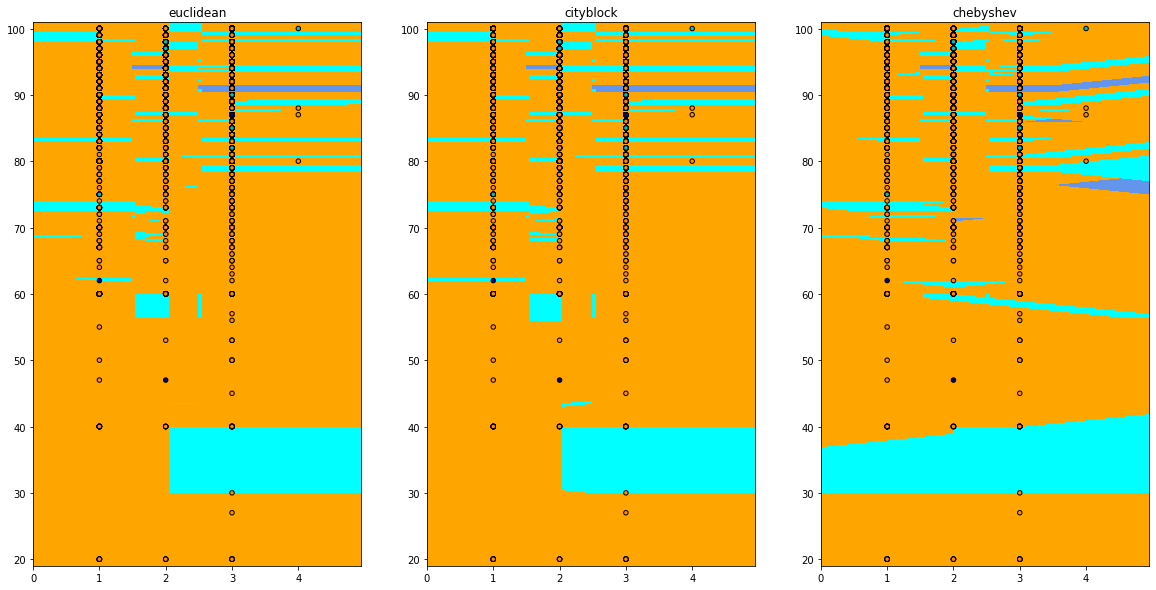

In [ ]:
# set the hyperparameter k
k=16

fig, (ax1,ax2,ax3) = plt.subplots(1,3 ,figsize= (20,10))
#fig,ax1 = plt.subplots(1,1, figsize= (10,10))

# generate the model
model1 = KNeighborsClassifier(k, metric="euclidean")
model2 = KNeighborsClassifier(k, metric="cityblock")
model3 = KNeighborsClassifier(k, metric="chebyshev")

ax1 = visualize_model2(model1, ax1, "euclidean" )
ax2 = visualize_model2(model2, ax2, "cityblock" )
ax3 = visualize_model2(model3, ax3,"chebyshev" )

In [ ]:
from sklearn.metrics import accuracy_score

# fit training data
model1.fit(X_train, y_train)
# predict the validation data
y_pred = model1.predict(X_test)
# obtain the accuracy value
accuracy_1 = f"{accuracy_score(y_test, y_pred):.2f}"


model2.fit(X_train, y_train)
# predict the validation data
y_pred = model2.predict(X_test)
# obtain the accuracy value
accuracy_2 = f"{accuracy_score(y_test, y_pred):.2f}"

model3.fit(X_train, y_train)
# predict the validation data
y_pred = model3.predict(X_test)
# obtain the accuracy value
accuracy_3 = f"{accuracy_score(y_test, y_pred):.2f}"


print ("Accuracy for euclidean = " , accuracy_1)
print ("Accuracy for cityblock = " , accuracy_2)
print ("Accuracy for chebyshev = " , accuracy_3)

Accuracy for euclidean =  0.39
Accuracy for cityblock =  0.39
Accuracy for chebyshev =  0.39


###<font color = "red">Results & Discussion</font>

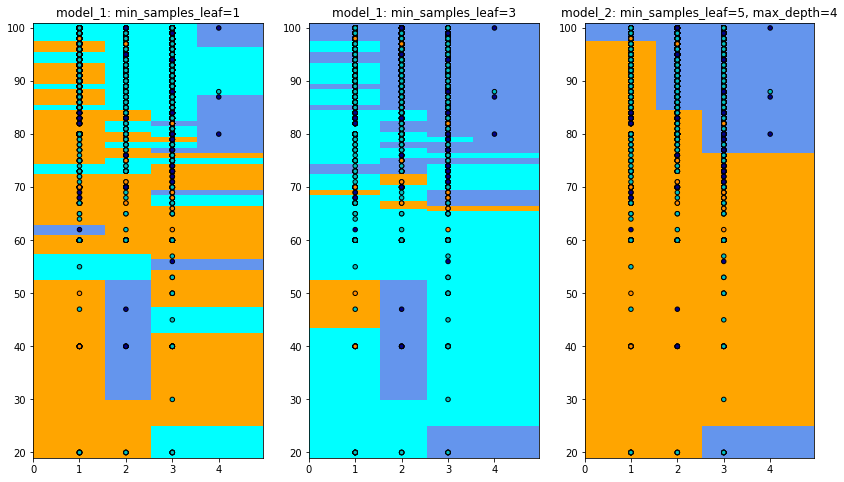

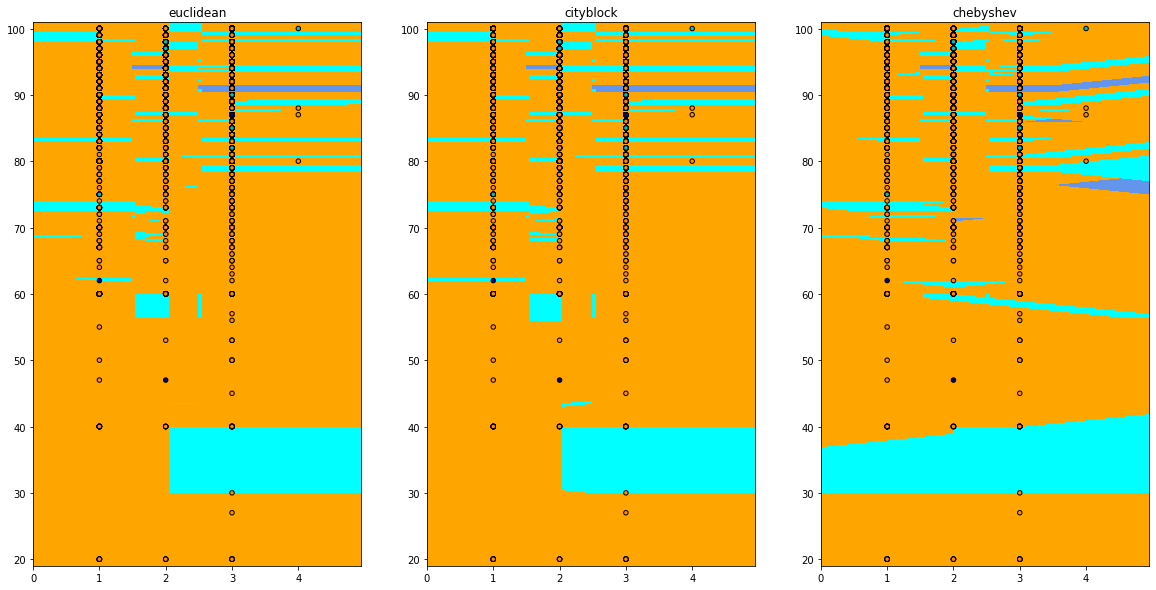

Firstly, we implemented the machine learning algorithms on price as target. But then our accuracy scores were so low than we expected (0.01 , 0.04). While investigating the reason of failure, we realized that we are trying to guess exact price number. Then, we decided to use price categories that is concstructed above in price part. This let us to learn that do not use dicrete algorithms to measure continuous variables.

We used 2 different machine learning algorithms.
One of them is the "Decision Trees Algorithm". We showed 3 decision trees with different min sample leaf features.
According to the result of accuracies, we obtained a decision tree with min sample = 5 has more accuracy level than other kinds of decision trees.
So, using the decision tree with min sample leaf = 5 gives more accurate interpretation rather than other decision trees. 

Another machine learning algorithm we used is the "K-Nearest Neighbours Algorithm". We visualized 3 different models which are using 3 different distance functions.
Among cityblock, chebyshev and euclidean distance functions they all gave the same accuracy value. 
So, the K-Nearest Neighbour model does not distinguish with respect to the distance function it uses.


The advantage of the "Decision Trees Algorithm" is that accuracy of this algorithm is larger than the "K-Nearest Neighbours Algorithm". 
The disadvantage of both two algorithms is that their accuracy values are under 50% which are not sufficient to use one of them while making predictions. They are not enough reliable.


#<font color = "blue">Result</font>

In order to compare impacts of three variables on price values, we calculated **correlation coefficient**. We compared the variables and found which one is more significant in order to increase price level.

In [ ]:
x = df2['Review scores rating']
y = df2['Price']
print("Rating: ", np.corrcoef(x, y, rowvar=True)[1][0])

x = df['availability_365']
y = df['price']
print("Availability: ", np.corrcoef(x, y, rowvar=True)[1][0])

x = df2['Cancellation policy number']
y = df2['Price']
print("Cancellation policy: ", np.corrcoef(x, y, rowvar=True)[1][0])

Rating:  0.047034280330514815
Availability:  0.10505037634218874
Cancellation policy:  0.17651459438615458



The highest accuracy score belongs to the <font color = "yellow">cancellation policy.</font>

It means that when the cancellation policy of a room is **more strict**, this room's **price is higher**.

On the other hand, before all observations, we expected that a more flexible cancellation policy increases the price. 

Since the world may change every day, people want to be able to cancel their reservations until the last minute and do not want to lose any money due to cancellation. 

However, data approves that we are mistaken with our assumption. Being flexible on cancellation decreases the price level.


#<font color = "blue">Conclusion</font>
As a result of the project, we learned that all data in a dataset can be negatively/positively correlated or uncorrelated.
We especially examined three variables and their effect on the price level. 
All three variables are positively related to price, but some are more profound. 
On the other hand, none of them goes parallelly with the price level. 
However, we can conclude a concrete assertion that cancellation policy has the greatest impact on price. 
Therefore, we can suggest to Air-BnB hosts that they should focus more on the cancellation policy rather than ratings and availability. 
They should be more strict about cancellation in order to make more profit.


The advantage of the project is that we have been seen which property of a room is more valuable.

The disadvantage of the project is the correlations of variables are not strong enough. 
For this reason, we assume that our most relevant variable is highly correlated, 
but if we would find some data that is more than correlated with the 50% to the price, we understand that our optimal variable is not that relevant.

